<a href="https://colab.research.google.com/github/zadel28/nyu-python-public-policy/blob/master/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [42]:
# Step 1. Load the datasets:

df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [43]:
df.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
1,1,1,39889166,08/01/2018 12:00:26 AM,08/18/2018 10:46:43 AM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10031,528 WEST 136 STREET,WEST 136 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/18/2018 10:46:43 AM,09 MANHATTAN,1.019880e+09,MANHATTAN,997239.0,238074.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)",109.0
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0


In [0]:
sc = pd.read_csv('https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD', header='infer')

In [9]:
sc.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
0,07/31/2018,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
1,07/31/2018,Bronx,202,NaN,1.0,NaN,NaN,3.0,NaN,6.0
2,07/31/2018,Bronx,203,NaN,2.0,5.0,NaN,5.0,2.0,9.0
3,07/31/2018,Bronx,204,NaN,NaN,2.0,NaN,18.0,NaN,14.0
4,07/31/2018,Bronx,205,NaN,2.0,3.0,NaN,12.0,NaN,5.0


In [0]:
# Step 2. Filter the shelter count dataframe to only keep rows where the value in the 'Report Date' column is '09/30/2019'

sc_filter = sc[sc['Report Date'] == '09/30/2019']

In [14]:
sc_filter

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0
629,09/30/2019,Bronx,206,NaN,1.0,2.0,1.0,3.0,NaN,19.0
630,09/30/2019,Bronx,207,NaN,1.0,5.0,NaN,4.0,NaN,3.0
631,09/30/2019,Bronx,208,NaN,NaN,NaN,NaN,NaN,NaN,1.0
632,09/30/2019,Bronx,209,NaN,NaN,1.0,NaN,5.0,NaN,2.0
633,09/30/2019,Bronx,210,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [0]:
sc_filter2 = sc_filter.groupby(['Community District', 'Borough', 'Report Date']).sum()

In [22]:
sc_filter2

,,,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
Community District,Borough,Report Date,,,,,,,
101,Manhattan,09/30/2019,0.0,0.0,0.0,0.0,0.0,1.0,0.0
103,Manhattan,09/30/2019,0.0,0.0,7.0,2.0,3.0,2.0,3.0
104,Manhattan,09/30/2019,0.0,1.0,3.0,0.0,0.0,4.0,0.0
105,Manhattan,09/30/2019,0.0,1.0,0.0,0.0,0.0,8.0,1.0
106,Manhattan,09/30/2019,0.0,0.0,3.0,0.0,0.0,0.0,0.0
107,Manhattan,09/30/2019,0.0,1.0,3.0,0.0,0.0,0.0,3.0
108,Manhattan,09/30/2019,0.0,0.0,1.0,0.0,0.0,0.0,0.0
109,Manhattan,09/30/2019,0.0,0.0,0.0,0.0,1.0,0.0,5.0
110,Manhattan,09/30/2019,0.0,1.0,10.0,0.0,1.0,0.0,11.0


In [0]:
# Step 3. Create a new column in the shelter count dataframe that calculates the sum of all the individual count columns: 'Adult Family Comm Hotel', 'Adult Family Shelter', 'Adult Shelter', 'Adult Shelter Comm Hotel', 'FWC Cluster', 'FWC Comm Hotel', 'FWC Shelter'

z = []
for index, row in sc_filter2.iterrows():
  z.append(row['Adult Family Comm Hotel'] + row['Adult Family Shelter'] + row['Adult Shelter'] + row['Adult Shelter Comm Hotel'] + row['FWC Cluster'] + row['FWC Comm Hotel'] + row['FWC Shelter'])

sc_filter2['Total Shelter Count'] = z

In [29]:
sc_filter2

,,,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,Total Shelter Count
Community District,Borough,Report Date,,,,,,,,
101,Manhattan,09/30/2019,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
103,Manhattan,09/30/2019,0.0,0.0,7.0,2.0,3.0,2.0,3.0,17.0
104,Manhattan,09/30/2019,0.0,1.0,3.0,0.0,0.0,4.0,0.0,8.0
105,Manhattan,09/30/2019,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0
106,Manhattan,09/30/2019,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0
107,Manhattan,09/30/2019,0.0,1.0,3.0,0.0,0.0,0.0,3.0,7.0
108,Manhattan,09/30/2019,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
109,Manhattan,09/30/2019,0.0,0.0,0.0,0.0,1.0,0.0,5.0,6.0
110,Manhattan,09/30/2019,0.0,1.0,10.0,0.0,1.0,0.0,11.0,23.0


In [0]:
# Step 4. From the 311 dataset, create a subset of all the 311 requests where complaint_type == 'Homeless Person Assistance'

dfh = df[df.complaint_type == 'Homeless Person Assistance']

In [45]:
dfh.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
46,46,46,39887175,08/01/2018 12:15:12 AM,08/01/2018 01:29:09 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10016,478 THIRD AVENUE,THIRD AVENUE,EAST 32 STREET,EAST 33 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:15:12 AM,The mobile outreach response team offered serv...,08/01/2018 01:29:09 AM,06 MANHATTAN,1.008880e+09,MANHATTAN,990113.0,210611.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.744753,-73.978841,"(40.74475319239264, -73.97884116795397)",106.0
47,47,47,39883411,08/01/2018 12:15:39 AM,08/01/2018 01:33:51 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Residential Building/House,10035,445 EAST 120 STREET,EAST 120 STREET,1 AVENUE,PLEASANT AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:15:39 AM,The mobile outreach response team went to the ...,08/01/2018 01:33:51 AM,11 MANHATTAN,1.018080e+09,MANHATTAN,1003119.0,229980.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.797898,-73.931850,"(40.797897839118114, -73.93184977463629)",111.0
145,150,150,39881402,08/01/2018 12:59:43 AM,08/01/2018 02:10:40 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10027,624 WEST 125 STREET,WEST 125 STREET,BROADWAY,ST CLAIR PLACE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:59:43 AM,The mobile outreach response team went to the ...,08/01/2018 02:10:40 AM,09 MANHATTAN,1.019950e+09,MANHATTAN,995623.0,236699.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.816352,-73.958912,"(40.81635246371125, -73.95891211015879)",109.0
371,394,394,39888951,08/01/2018 04:10:47 AM,08/01/2018 05:18:59 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10003,115 EAST 14 STREET,EAST 14 STREET,4 AVENUE,IRVING PLACE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 05:10:47 AM,The individual was found and outreach assistan...,08/01/2018 05:18:59 AM,05 MANHATTAN,1.008708e+09,MANHATTAN,987266.0,206735.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.734116,-73.989117,"(40.73411596377878, -73.98911737171056)",105.0


In [0]:
# Step 5. Group the 311 subset by 'borocd' to get the count of 'Homeless Person Assistance' requests per community district

count_dfh = dfh.groupby('borocd').size().reset_index(name='count_311_homeless')

In [47]:
count_dfh

,borocd,count_311_homeless
0,101.0,758
1,102.0,965
2,103.0,520
3,104.0,1055
4,105.0,3020
5,106.0,753
6,107.0,1684
7,108.0,633
8,109.0,303
9,110.0,283


In [0]:
# Step 6. Merge the homeless 311 request count table (from Step 5) with the shelter count table (from Step 3).

merged = pd.merge(left=count_dfh, right=sc_filter2, left_on='borocd', right_on='Community District')

In [49]:
merged

,borocd,count_311_homeless,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,Total Shelter Count
0,101.0,758,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,103.0,520,0.0,0.0,7.0,2.0,3.0,2.0,3.0,17.0
2,104.0,1055,0.0,1.0,3.0,0.0,0.0,4.0,0.0,8.0
3,105.0,3020,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0
4,106.0,753,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0
5,107.0,1684,0.0,1.0,3.0,0.0,0.0,0.0,3.0,7.0
6,108.0,633,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,109.0,303,0.0,0.0,0.0,0.0,1.0,0.0,5.0,6.0
8,110.0,283,0.0,1.0,10.0,0.0,1.0,0.0,11.0,23.0
9,111.0,373,0.0,0.0,10.0,0.0,7.0,0.0,8.0,25.0


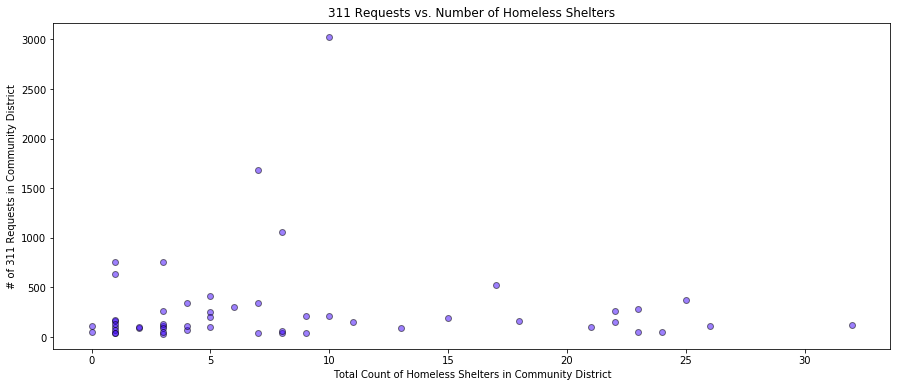

In [54]:
# Step 7. Produce a scatter plot of the data using the matplotlib package. What is your initial impression on whether there is a correlation between number of shelters and count of 311 homeless service requests?

plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged['Total Shelter Count']),
    np.array(merged.count_311_homeless),
    c='#3d03fc',
    edgecolors='black',
    alpha=0.5)

plt.title('311 Requests vs. Number of Homeless Shelters')
plt.xlabel('Total Count of Homeless Shelters in Community District')
plt.ylabel('# of 311 Requests in Community District')

plt.show()

There doesn't appear to be any relationship between 311 requests relating to homelessness and the number of homeless shelters in a community district.

In [55]:
# Step 8. Use np.corrcoef(x, y) to identify the correlation coefficient between count of total shelter buildings and count of homeless requests per community district.

x = np.array(merged['Total Shelter Count'])
y = np.array(merged.count_311_homeless)

np.corrcoef(x, y)

array([[ 1.        , -0.00781267],
       [-0.00781267,  1.        ]])

In [57]:
# Step 9. Perform a linear regression with count of total shelter buildings as the independent variable and count of homeless requests as the dependent variable 

y = np.array(merged['Total Shelter Count'])

x = np.array(merged.count_311_homeless)
x = sm.add_constant(x)

print(x)

model = sm.OLS(y, x).fit()

print(model.summary())

[[1.000e+00 7.580e+02]
 [1.000e+00 5.200e+02]
 [1.000e+00 1.055e+03]
 [1.000e+00 3.020e+03]
 [1.000e+00 7.530e+02]
 [1.000e+00 1.684e+03]
 [1.000e+00 6.330e+02]
 [1.000e+00 3.030e+02]
 [1.000e+00 2.830e+02]
 [1.000e+00 3.730e+02]
 [1.000e+00 2.620e+02]
 [1.000e+00 1.880e+02]
 [1.000e+00 4.000e+01]
 [1.000e+00 4.700e+01]
 [1.000e+00 1.220e+02]
 [1.000e+00 1.010e+02]
 [1.000e+00 1.080e+02]
 [1.000e+00 8.800e+01]
 [1.000e+00 9.900e+01]
 [1.000e+00 5.700e+01]
 [1.000e+00 3.000e+01]
 [1.000e+00 5.200e+01]
 [1.000e+00 6.600e+01]
 [1.000e+00 3.380e+02]
 [1.000e+00 4.140e+02]
 [1.000e+00 2.620e+02]
 [1.000e+00 2.150e+02]
 [1.000e+00 1.620e+02]
 [1.000e+00 3.380e+02]
 [1.000e+00 2.090e+02]
 [1.000e+00 1.530e+02]
 [1.000e+00 8.600e+01]
 [1.000e+00 1.030e+02]
 [1.000e+00 1.590e+02]
 [1.000e+00 1.670e+02]
 [1.000e+00 1.290e+02]
 [1.000e+00 4.900e+01]
 [1.000e+00 1.090e+02]
 [1.000e+00 1.140e+02]
 [1.000e+00 2.540e+02]
 [1.000e+00 2.000e+02]
 [1.000e+00 9.800e+01]
 [1.000e+00 1.320e+02]
 [1.000e+00

In [63]:
# Step 10. Produce a scatter plot of the data with the line of best fit from your linear regression using the matplotlib package

p = model.params # intercept and coefficient
print('parameters:', p)

r2 = model.rsquared
print('R2:', r2)

parameters: [ 8.63529994e+00 -1.35869507e-04]
R2: 6.103776725729926e-05


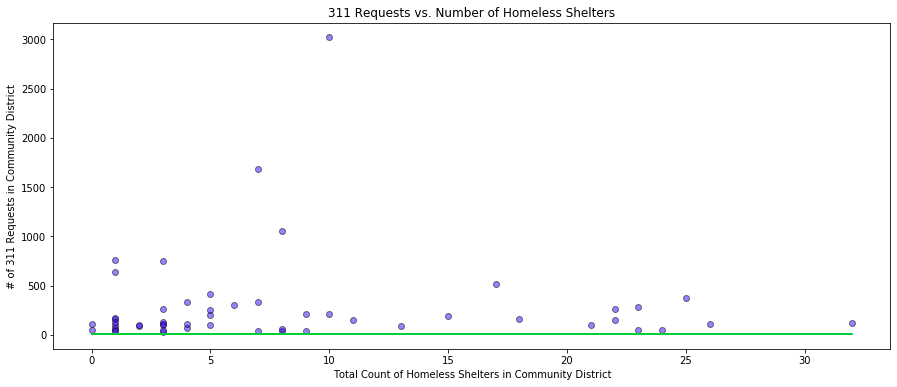

In [68]:
x_dummy = np.array(merged['Total Shelter Count'])

plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged['Total Shelter Count']),
    np.array(merged.count_311_homeless),
    c='#3d03fc',
    edgecolors='black',
    alpha=0.5)

plt.plot(
    x_dummy, 
    p[0] + p[1] * x_dummy,
    c='#00d138', # lighter green
    label=label)

plt.title('311 Requests vs. Number of Homeless Shelters')
plt.xlabel('Total Count of Homeless Shelters in Community District')
plt.ylabel('# of 311 Requests in Community District')

plt.show()

**Step 11: Write a sentence or two explaining the results of your analysis. What do the numbers and chart tell you about the relationship between concentration of homeless shelters vs. frequency of 311 requests related to homelessness?**

The scatter plot and the almost perfectly horizontal line of best fit make it clear that there is no relationship between the concentration of homeless shelters and frequency of 311 requests. Additionally, the R squared value of 0 provides even more evidence of the lack of relationship between the two variables. 